In [75]:
# from sympy import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint 
import csv
from tabulate import tabulate
import os

In [203]:
def sorting_cea(tabulation, input):
    # reading input file
    input_list = []
    with open(input, "rt") as input_file:
        for line in input_file:
            input_list.append(line)
    
    for i in input_list:
        if "o/f= " in i:
            i = i[4:-1]
            ofr_list = i.split(",")
        if "p,psia= " in i:
            i = i[8:-1]
            p_list = i.split(",")

    print("OF Ratios: ", ofr_list)
    print("Chamber Pressures: ", p_list)
    
    #reading tabulation
    tabulation_file = open(tabulation)
    tab_list= list(csv.reader(tabulation_file, delimiter="\t"))

    # pops out the variables from the first row of the tabulation
    vars = tab_list.pop(0)[0].split()
    print("variables: ", vars)

    # Divides tabulation into Chamber, Throat, and Exit data
    chamber = []
    throat = []
    exit = []
    pn = len(p_list)

    if pn > 1:
        chambers = []
        throats = []
        exits = []

        for i in range(pn):
            chambers.append([])
            throats.append([])
            exits.append([])
            exit.append([])

    for i in range(len(tab_list)):
        if i % (2+len(exit)) == 0:
            chamber.append(tab_list[i])
        if i % (2+len(exit)) == 1:
            throat.append(tab_list[i])
        for j in range(pn):
            if i % (2+len(exit)) == j+2:
                exit[j].append(tab_list[i])

    print(tabulate(chamber))

    if pn > 1:
        length = int(len(chamber)/pn)

        # for i in range(length):
        #     for j in range(pn):
        #         chambers[j].append(chamber[i*(j+1)])
        #         throats[j].append(throat[i*(j+1)])

        for i in range(pn):
            for j in range(len(exit[i])):
                if j % pn == i:
                    exits[i].append(exit[i][j])
                    throats[i].append(throat[j])
                    chambers[i].append(chamber[j])
        
    print(tabulate(chambers[0]))

    return [ofr_list, p_list, vars, chambers, throats, exits]

In [204]:
dirname = os.path.abspath('')

# place your input file and tabulation into the same file as this code and enter the names of the respective files below: 
tabulation = os.path.join(dirname, "CEA_tabulation_meth_400.txt")
input = os.path.join(dirname, "CEA_input.txt")

sorted_cea = sorting_cea(tabulation, input)

OF Ratios:  [' 2', ' 2.1', ' 2.2', ' 2.3', ' 2.4', ' 2.5', ' 2.6', ' 2.7', ' 2.8', ' 2.9', ' 3', ' 3.1', ' 3.2', ' 3.3', ' 3.4', ' 3.5']
Chamber Pressures:  ['300', ' 400', ' 500', ' 600']
variables:  ['p', 'isp', 't', 'pip', 'aeat']
----------------------------------------------------------
2.0684E+01  0.0000E+00  2.5410E+03  1.0000E+00  0.0000E+00
2.7579E+01  0.0000E+00  2.5442E+03  1.0000E+00  0.0000E+00
3.4474E+01  0.0000E+00  2.5464E+03  1.0000E+00  0.0000E+00
4.1368E+01  0.0000E+00  2.5481E+03  1.0000E+00  0.0000E+00
2.0684E+01  0.0000E+00  2.6792E+03  1.0000E+00  0.0000E+00
2.7579E+01  0.0000E+00  2.6846E+03  1.0000E+00  0.0000E+00
3.4474E+01  0.0000E+00  2.6884E+03  1.0000E+00  0.0000E+00
4.1368E+01  0.0000E+00  2.6913E+03  1.0000E+00  0.0000E+00
2.0684E+01  0.0000E+00  2.8034E+03  1.0000E+00  0.0000E+00
2.7579E+01  0.0000E+00  2.8115E+03  1.0000E+00  0.0000E+00
3.4474E+01  0.0000E+00  2.8173E+03  1.0000E+00  0.0000E+00
4.1368E+01  0.0000E+00  2.8218E+03  1.0000E+00  0.0000E+00

In [250]:
def plotting(input_thing, **kwargs):
    ofr_list, p_list, vars, chamber, throat, exit = input_thing
    
    # T vs ISP plots
    isp = []
    t = []
    isp_ind = vars.index("isp")
    t_ind = vars.index("t")
    # print(isp_ind)
    
    # for each pressure range
    for i in range(len(p_list)):
        # print(exit[i][2][0].split())
        # sorting through the exits
        isp.append([])
        t.append([])
        for j in range(len(exit[i])):
            isp[i].append(float(exit[i][j][0].split()[isp_ind])/9.8)
            t[i].append(float(chamber[i][j][0].split()[t_ind]))

        # print(exit[i])
        # print(isp)

        fig, ax1 = plt.subplots()

        ax1.plot(ofr_list, isp[i], color = "red")
        ax1.set_xlabel("OF ratio", color = "white")
        ax1.set_ylabel("Isp (s)", color = "red")
        ax1.tick_params(axis="both", labelcolor = "white")
        title = "Temperature and Specific impulse at {pressure} chamber pressure".format(pressure = p_list[i])
        ax1.set_title(title, color="white")

        ax2 = ax1.twinx()
        ax2.set_ylabel('temperature (K)', color="green")  
        ax2.plot(ofr_list, t[i], color="green")
        ax2.tick_params(axis='y', labelcolor="white")

        plt.show()

    # print(tabulate(isp))
    
    # 3D ISP, OF, P plots + flattened
    ax = plt.axes(projection="3d")
    p_list_mesh = []
    ofr_list_mesh = []
    for i in range(len(ofr_list)):
        p_list_mesh.append(p_list)
    for i in range(len(p_list)):
        ofr_list_mesh.append(ofr_list)

    p_list_mesh = np.array(p_list_mesh).transpose()
    ofr_list_mesh = np.array(ofr_list_mesh)
    isp = np.array(isp)

    print(ofr_list_mesh.size())
    print((p_list_mesh))
    print((isp))

    ax.plot_surface( p_list, ofr_list, isp, cmap="viridis", edgecolor="none")
    ax.tick_params(axis="both", color="white")
    plt.show
    
    # 3D T, OF, P plots + flattened

    # Fuel volume vs OF plots?
    return t, isp, ofr_list

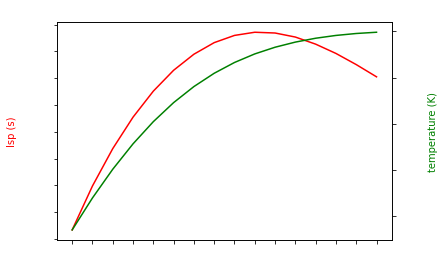

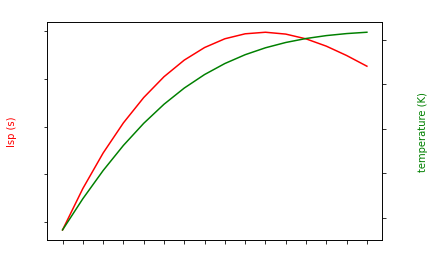

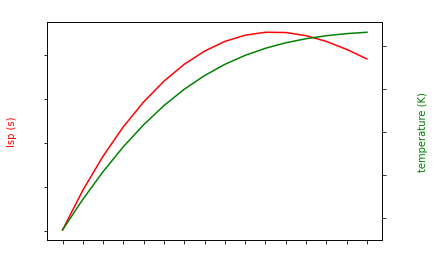

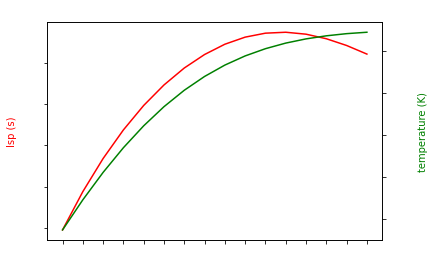

TypeError: 'int' object is not callable

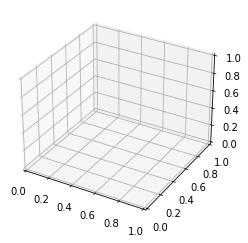

In [251]:
# getting user input, make this prettier
t, isp, ofr_list = plotting(sorted_cea)
of_value = input("enter comma seperated list of OF value")
of_value = of_value.split(",")
isp_interp = np.interp(of_value, ofr_list, isp)
t_interp = np.interp(of_value, ofr_list, t)
# v_interp = np.interp(of_value, ofr_list,)
pretty = [of_value, isp_interp, t_interp]
print(tabulate(pretty))

In [ ]:
dot_m = 2.51
time = 15
fOF = 2
mass = dot_m * time

mass_fuel = mass/(fOF + 1)
mass_ox = fOF * mass_fuel
Density_ox = 71.23
Density_meth = 26.51


Volume = mass_ox / Density_ox + mass_fuel / Density_meth
print(Volume*28.3168)

23.38361352519264


In [ ]:
class rocket:
    # constructor
    def __init__(self, m_dry, m_prop, mass_flow, burntime, isp, cd, diameter):
        
        # user defined rocket
        self._m_dry = m_dry
        self._m_prop = m_prop
        self._mass_flow = mass_flow
        self._burntime = burntime
        self._isp = isp
        self._cd = cd
        self._d = diameter
        
        # calculate area of rocket
        self._area = np.pi * (self._d/2)**2
        self._ugly_mass_flow = mass_flow

        # calculate propellant mass of rocket
        # self._m_prop = mass_flow * burntime

        # self.state_variables
    
    def _mass(self, t): 
        if t < self._burntime:
            mass = self._m_dry + self._m_prop - self._ugly_mass_flow * t #ugly
            # print("omgt: ", str(t), " m: ", str(mass))
            return mass
        else:
            self._mass_flow = 0 
            mass = self._m_dry
            return mass 
    
    # for troposphere so altitude < 36152 https://www.grc.nasa.gov/www/k-12/airplane/atmos.html
    # def _air_density(self, altitude):
    #     T = 59 - 0.00356 * altitude # temperature at that level
    #     p = 2116 * ((T + 459.7)/518.6)**5.256
    #     rho = p / (1718 (T + 459.7)) * 32.174 # converting from slugs/ft^3 to lb/ft^3
    #     return rho
        
    def _vectorfield(self, state, t):
        #state
        v, p = state
        
        # parameters        
        rho = 0.0765 
        
        # relations H&H, and aero. 
        f = [((self._isp * self._mass_flow * 9.8) - (self._mass(t) * 9.8) - (self._cd * rho * v**2 * np.pi* (self._d/2)**2/2) 
              - self._mass_flow * v)/self._mass(t),
             v] 
        
        return f
    
    def altitude(self):
        # initial conditions
        
        v0 = 0
        p0 = 0
        w0 = [v0, p0]
        
        stoptime = 100
        numpoints = 200
        # abserr = 1.0e-8
        # relerr = 1.0e-6
        

        t = [ stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]
        
        solution = odeint(self._vectorfield, w0, t)  #, atol = abserr, rtol = relerr)
        
        v = solution[:, 0]
        p = solution[:, 1]
        m = []
        
        for i in range(len(t)):
            m.append(self._mass(i))
            print("t: %6.2f, p: %8.2f, v: %8.2f, m: %6.2f" % (t[i], p[i], v[i], m[-1]))
        plt.plot(t, v)
        plt.show()
        plt.plot(t, p)
        plt.show()
        plt.plot(t, m)
        plt.show()
        
        return solution

In [ ]:
# making and launching rocket

m_prop = 25.09 # lb
m_dry = 70.0 - m_prop
mass_flow = 2.51 
burntime = 10
isp = 279
cd = 0.6
diameter = 5 / 12 # ft

spark = rocket(m_dry, m_prop, mass_flow, burntime, isp, cd, diameter)
x  = spark.altitude()
# spark._mass(9.99999999)

# x[:,0
